# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn import metrics

kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
#Pasamos nuestro dataset, nuestros clusters, nuestra metrida/meduida,tamaño de la muestra para el score
score = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean',sample_size=len(X))
print('\n Numero de clusters =',8)
print('Silhouette Score =',score)



 Numero de clusters = 8
Silhouette Score = 0.5486213604076143


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [4]:


kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
#Pasamos nuestro dataset, nuestros clusters, nuestra metrida/meduida,tamaño de la muestra para el score
score = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean',sample_size=len(X))
print('\n Numero de clusters =',5)
print('Silhouette Score =',score)


 Numero de clusters = 5
Silhouette Score = 0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [5]:


kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
#Pasamos nuestro dataset, nuestros clusters, nuestra metrida/meduida,tamaño de la muestra para el score
score = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean',sample_size=len(X))
print('\n Numero de clusters =',3)
print('Silhouette Score =',score)


 Numero de clusters = 3
Silhouette Score = 0.5711381937868844


In [6]:


kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
#Pasamos nuestro dataset, nuestros clusters, nuestra metrida/meduida,tamaño de la muestra para el score
score = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean',sample_size=len(X))
print('\n Numero de clusters =',4)
print('Silhouette Score =',score)


 Numero de clusters = 4
Silhouette Score = 0.560594106006063


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html Sum of squared distances of samples to their closest cluster center.

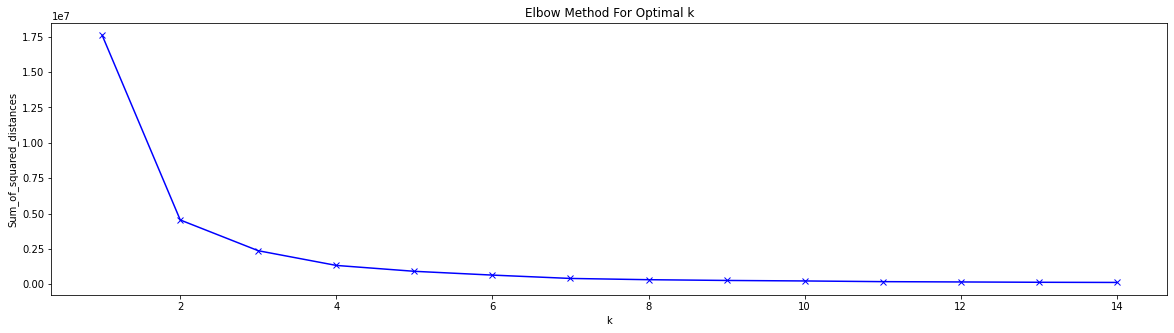

In [7]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

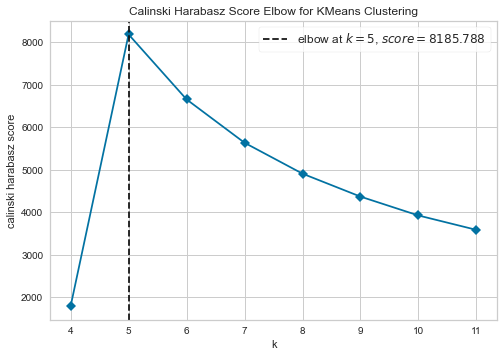

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [24]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 5 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=5, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [8]:
# El cluster 5 es el que tiene mejor explicatibidad, donde 5 es el mejor, donde este la rayita de p
#puntitos es la mejor opcionde cluster

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [9]:
from yellowbrick.cluster import KElbowVisualizer

In [10]:
from sklearn.cluster import AgglomerativeClustering

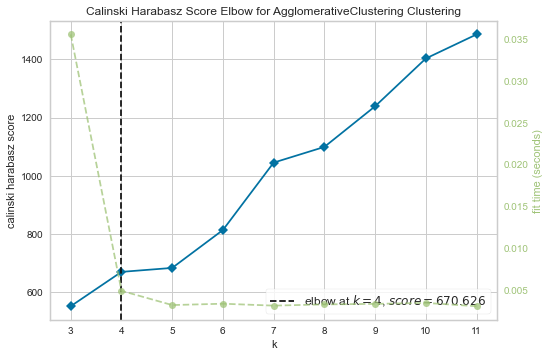

In [11]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,12), metric = 'calinski_harabasz')
visualizer.fit(X)
visualizer.poof();

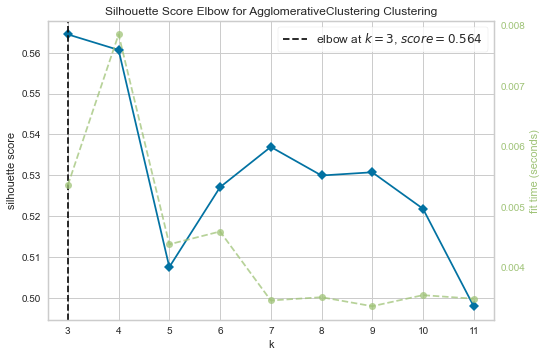

In [12]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,12), metric = 'silhouette')
visualizer.fit(X)
visualizer.poof();

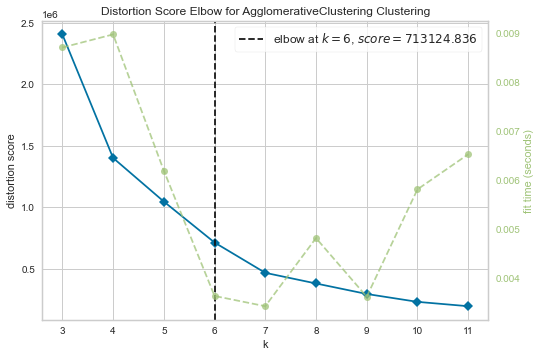

In [13]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,12), metric = 'distortion')
visualizer.fit(X)
visualizer.poof();


## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [17]:
import seaborn as sns

In [14]:
dataframe = pd.concat([X,y], axis = 1).rename(columns = {0:'target'})
dataframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [15]:
model = KMeans(n_clusters = 6)
model.fit(X)

X['clusters'] = model.labels_

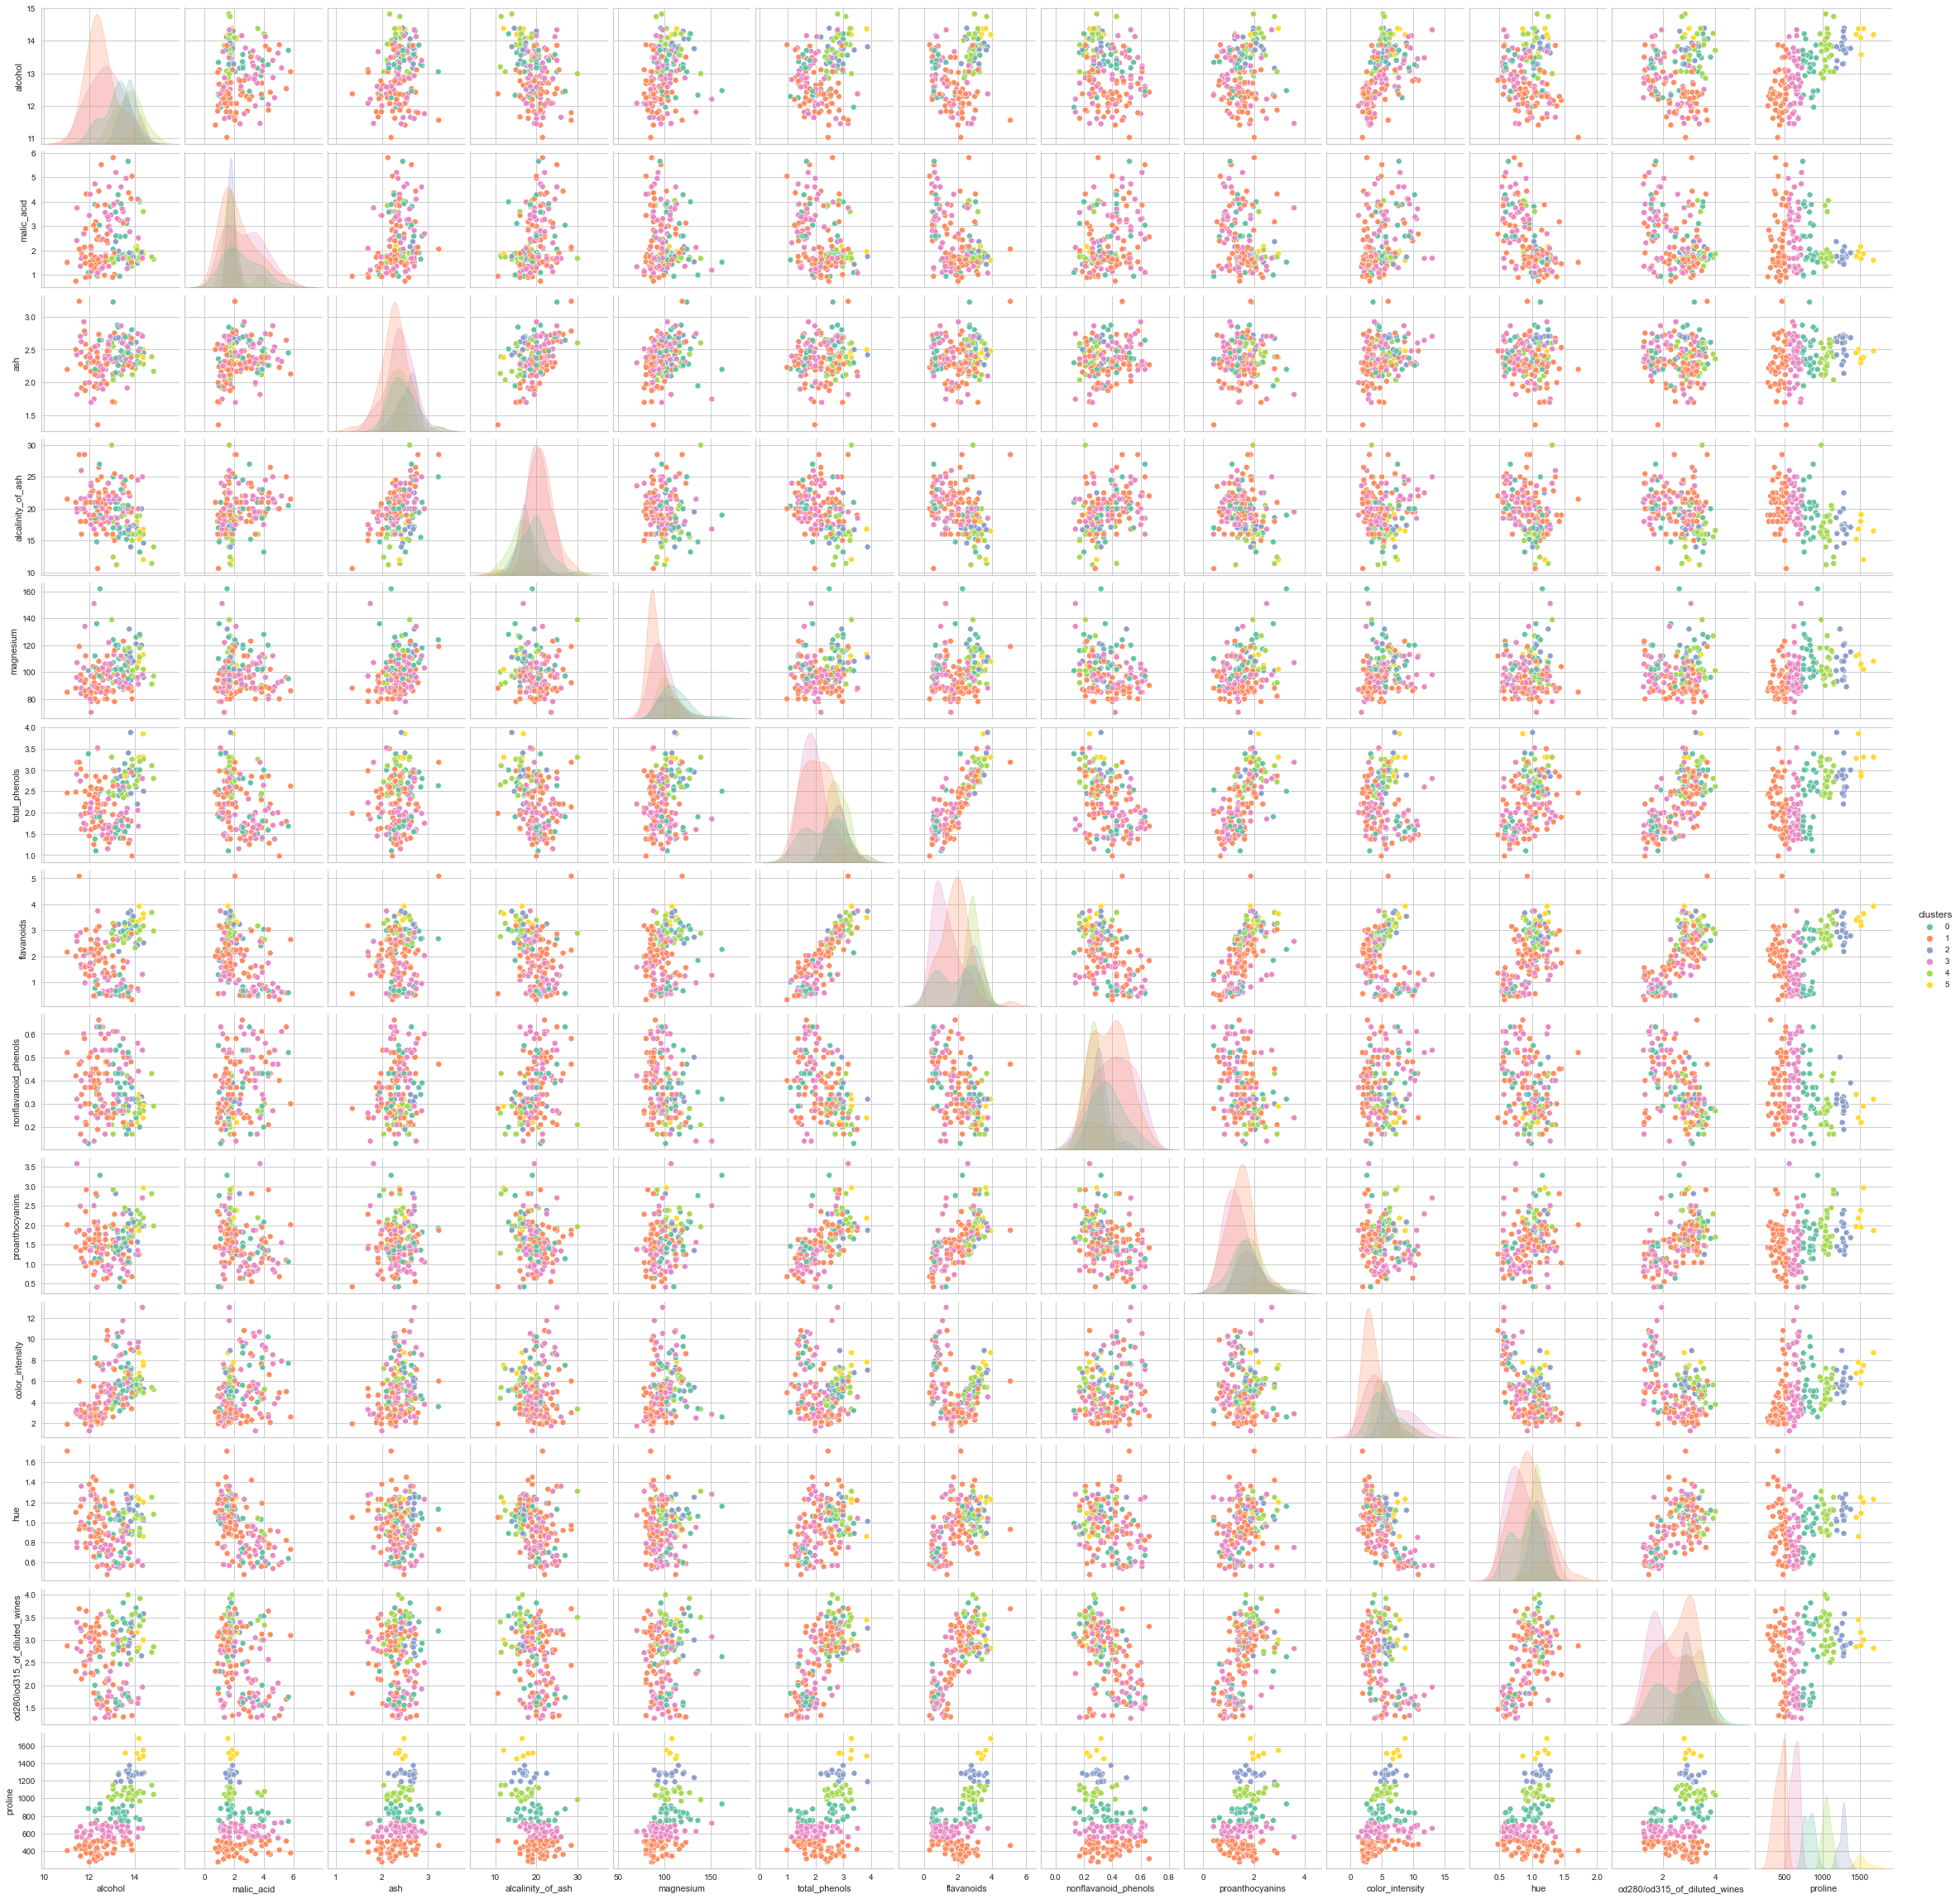

In [18]:
sns.pairplot(data = X, kind = 'scatter', hue = 'clusters', palette = 'Set2')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [19]:
from sklearn.decomposition import PCA

In [24]:
X2 = X.drop('clusters', axis = 1)

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X2)

df_pca = pd.DataFrame(data = pca_data, columns = ['principal_component_1', 'principal_component_2'])

In [25]:
df_pca_comp = pd.DataFrame(data = pca.components_, columns = X2.columns.values, index = ['principal_component_1', 'principal_component2'])

<AxesSubplot:xlabel='principal_component_1', ylabel='principal_component_2'>

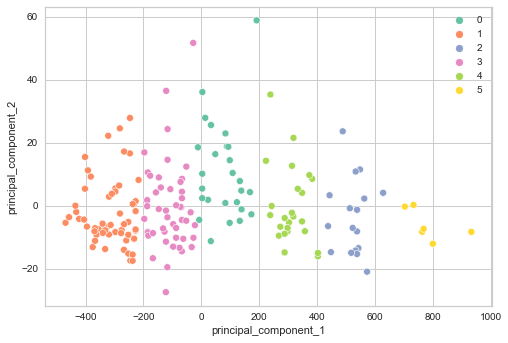

In [26]:
sns.scatterplot(x = df_pca['principal_component_1'], y = df_pca['principal_component_2'], palette = 'Set2', hue = model.labels_)

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [27]:
from sklearn.manifold import TSNE

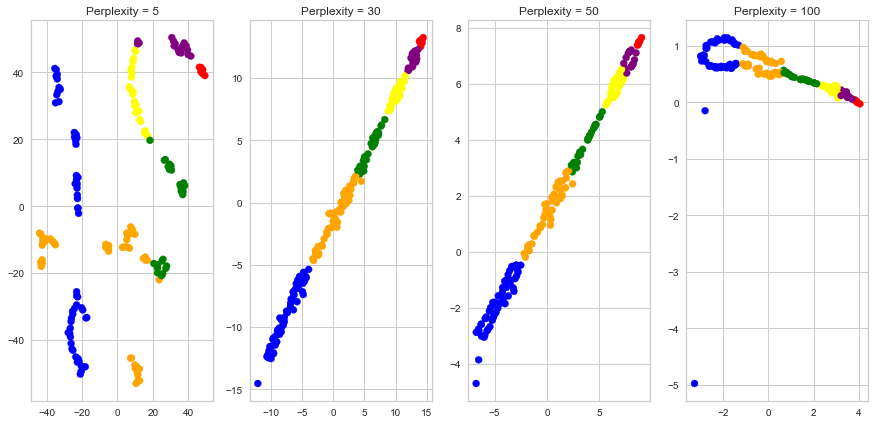

In [28]:
colores = ['green', 'blue', 'purple', 'orange', 'yellow', 'red']
asignar =[]
# para cada valor d clustter
for i in model.labels_:
    # ponle un color segun el cluster en el q esta
    asignar.append(colores[i])


fig, ax = plt.subplots(1,4, figsize = (15,7))
for i, perp in enumerate([5,30,50,100]):
    tsne = TSNE(perplexity = perp, random_state = 123)
    x3 = tsne.fit_transform(df_pca[['principal_component_1', 'principal_component_2']])
    ax[i].scatter(x3[:,0], x3[:,1], c = asignar)
    ax[i].set_title('Perplexity = {}'.format(perp))
plt.show()